# Table of Contents
 <p>

In [18]:
%matplotlib inline
import base64
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [4]:
import matplotlib
#debugging - show list of available animation writers
#nbb: had to install ffmpeg as root, was not in standard install
print(matplotlib.animation.writers.list())

[u'imagemagick_file', u'html', u'imagemagick', u'ffmpeg', u'ffmpeg_file']


In [5]:
def lin(a,b,x): return a*x+b

In [6]:
a=3.
b=8.

In [7]:
n=30
x = random(n)
y = lin(a,b,x)

In [8]:
x

array([ 0.699 ,  0.0608,  0.0898,  0.1754,  0.3973,  0.2946,  0.5694,  0.3142,  0.3192,  0.3596,
        0.5375,  0.0932,  0.3776,  0.0538,  0.474 ,  0.5174,  0.6196,  0.0924,  0.201 ,  0.5327,
        0.3333,  0.1629,  0.6978,  0.2295,  0.6033,  0.3924,  0.7795,  0.045 ,  0.3927,  0.6991])

In [9]:
y

array([ 10.097 ,   8.1824,   8.2695,   8.5261,   9.1919,   8.8837,   9.7081,   8.9426,   8.9575,
         9.0788,   9.6124,   8.2796,   9.1328,   8.1615,   9.4221,   9.5523,   9.8587,   8.2771,
         8.6029,   9.5981,   8.9999,   8.4888,  10.0935,   8.6885,   9.8098,   9.1772,  10.3385,
         8.1351,   9.1782,  10.0973])

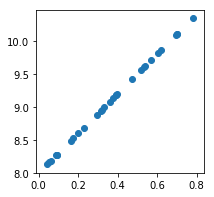

In [10]:
plt.scatter(x,y)

In [11]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [12]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

8.5262

In [13]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [14]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [15]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

In [16]:
#

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

In [21]:
#this below did not work. 
ani2 = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
print ("saving file")
ani2.save('sgd-intro_working.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
print ("file saved")
with open('sgd-intro_working.mp4', 'rb') as f:
    video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(base64.b64encode(f.read()).decode('utf-8'))


saving file
file saved


In [22]:
HTML(video_tag)
#dont know why this animation does not work - only showing last frame???

HTML(value=u'<video controls alt="test" src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAICptZGF0AAACrgYF//+q3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjY0MyA1YzY1NzA0IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTI1IHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAATT2WIhAA3//728P4FNjuY0JcRzeidMx+/Fbi6NDe9zgAAAwAAAwAO4+Whwb68chzQAABcck+B1/0HpUqo4nORoYFzrwOF52nNstpt+E/S0y6hwYG/T03RM2dpBuEcX7bB3rzOC3q2u9qfJPQYDaWBMauyvmqjeIGuF1cM+vWMXvwH0ACa23BUMRxO1ecOv+fuL9KII0XYrzBWYSnIM2YV/bzf2Ka2gOnsqmxw3krIHWamJ9rkstxpvcPzAP4SbRPqnCNJdlFSMFgxJcfZOQUrMYOoa77lNdvi0alVNvKzt6P2tQuMPo72yQVBHML8LJa7KgISqrWPmrwDyiGuPYDDp8KGfE3iuoO2NuLFJMUgOSEd/zgJFeXgZPSHVZzLCMFjso0Gq0t7Ol9NIdm0Agh15fKrN5S2BW1JmSeVr8ntLpQBRhAcjlarIWz3r6wP/ocgjYrhIdS9lTqincMcx1pUa0ASOQQnj2H/Qe72kK/Q+C4FKQhVSYWnoA+lgXEU297YFOOE8+rtjptq8RHuVNjgI1skFoMYVAAlfWHaOo/KGZzPeQi9GIHEaUo+5lk3V8YpsjG5BBlOidhviHMHqPv5T8ztyqC9gpQarKUi6Em2Czfm2Lxt2PTpZ/vXDil7bYjFTbplT1i/S73wbJb/RNAzDBzyUEbC9sdX4LZaJOjVj0AFrcYjq1UFpuNE2KZwihy0EZCib53dzsWaxdM4UbI+3zvbAr0wocHcH+vz8SE8GhE/+G/VBNYIDaV6xc+vsTJlILpZgYnByKdZX2K77dIF6iySpoj6Mj7lBvkvQO9YcUEmqw1wjyEmrvaFFy6z9/E2PBNgk2zLRKnhrBaHh0hQYXBipja1gIydO8YvKs41jGn/UpuSj2O7Ggs/X901zArov34CRz9uWG5uT/YoLo8vfjIf0fKFR5DyK799ciVHyipUNKELqNeW1X4gpt28l3AchBI4CM4xkxlrZAFHdZaXpVlx8h3Qm89vl5E8XOopCoP/zpXG9ft4mXTr8PK4Mv/AOS1bI1xBZd3XgOLlEW1zPdwoGbE7+KQsNwCiMpxo/n2iZnusk0kj1F6g2NLviYMQZgUeh4FwiXhNEJgWCEcTidFCXY4mGtYPDga/4NUZmR3mz6G2O5l4mEL5UKoAIPYp8WPRKB2Oh+bZJqMJJVvOYa7zFhoDY/atVO16kGLEt3ufPNd+xcugHt5Ifu8pplRDdcYjWqj5oMNRoRaTonkXjZj8I+fXq1xMLiutTVrZ0VyYlsIDZPFDyopHhbU1kyCtBOFfgu+B39moR4aQQFQrhOgb1QPf/Cz3ZYLfJNgQCBOzE2cnWpoTR8FLTwzolPfDWnkTDLDA5iPQUADpENLAngJRbyDk7RNIW2AQVkEzKeIKPTm3jlghwnlkJaelIIKRAXEzKThhnQ/fmcJQTabpTtmZKd4fMAXbf6fRcm6fErYGW2D1NYwQHGd3UtlmgZ9lhqrNF3g3v+mwjlbRrNesTmtoAA4XAW78Yz6EznFyPoSPXYuIQp0Hbz+yq+7tsjN3t8pJOtdkXwERLdt6GnLc3sgshKmbZmiD5iOcub0WOE73fmHOPEQYfbLgC/JTGMpPJ5qXOo4iWLCKx6SsxuFww0nVZECYYMQSeW/S4Gf2AauT/5QP+VzrPCwZzUgz2Z622MOvPY4UPIzPFRw4zK1D5qhzY+ioJfGQCPyLt4Hc1Oo2U0XdwO4hZESSnopUM3mP9OaTasxoMHXbmSTcgwan1k+gsaOSvK9bFw5p2qfxhs0pp2Z7bvltGF4A7Bx9zQjBQtvuwS/YOZd4x9p5ftHHkzlw8OR2Zno3ZlEf4f7JRlQBFJmFPVaEAJzeX+J/u7EIyJLsGkLdIx6q50VEZeNAlGvH3CYNe+D7Oj4mC/bc7M84W2hP4lQZOw5zRcBnwChRtkW1coviDpC0sCZug81yi0/zddtLcezExwELBgLuXmK9UqJHo6s8srxtziAoDDjcgbxFb1MDJVcLO/abuSTBTt37u754AnNztT9byONArceL6m374RFHxh5jdJ8k9EPXNPKUFAFAMM1VGeLoWlKS2GrmRQqjkfkChJzBjRUwdqMnt/zEPeLkiBC9LywdHf+PcKIuW9hLViZD/rWY09W2aQo44mZWR2SPLqmfnwsvgWKwyl41cn0PAmybTg5JZB3sJlABSJv52Backq1f9RPp04DHP1fX7NTc4dxDgUr63tWhqw7nJoryZX3wcdc/xIwpsLhgeAwdtKMcJkmdYm1q/K/nZbHEb9d+QaYsqJc4/iJW9OlP8O4bNEEmfexNN8CZ9Ug3mthIgSXso5xIz1HVsF2Zbs9h5zSRqDRCDmMs8pmNUYzyV0JID1+fUq7kQKiaR52L2jB5qoxC/7HKtj/CK15p0fcVbXl/5ychDJJ2WyUR0pjLRIMLwh2nSgFVnIuZesG1vqnm+YH+C1262Qgu5GvsL+ybAY4D37OqxvLPP1+JUQ6yL9g005PzQ2ANlz3lWjt0/CzSGV9ZXRMDbGddlFpgLUxceLb6M7GxxTSoSoYX9Sb8GlJk+j4pzwkqRzqEQodj57Rd+ZC3cblmLwrx8ZbT8FKFOpzAWFEFbEo1Sob7ze8Ep9UMakGP0BBNFPNok/QDhcPry4ickGasdlQk0GsQ3zCmIF19C9cW+Zg5AI0w1znXwPi8UD3MK4au9j/N/cmQPtLsIIGdrNUuobZz2N9/1mdI5QPtW1j8gX4ntRfGGBVQ7E3fxt4DXLWcX2kS19gwMnNyqkwEV95qmEZO/YoGLjAdtSSOXRwQz+MQ9ylZ8r6tY1hZj1D0orchXO+0nH3azY2L1zpL/IMlV/pbPGJJu8TcKxSZqyFzbYCk+793Zq2969MqzbjhXyVz8dguOxKSqiQrDJMclWlMN6rmQtvf0gjNqd1tIuJvslm1xDn1pKgWYMCqzsF+kmYdpCd